In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2: Load Dataset
# Uploading the file manually
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("bank-additional-full.csv", sep=';')
print("Data Loaded Successfully")

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Step 3: Explore Data
print(df.head())
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nTarget variable distribution:\n", df['y'].value_counts())
print("\nInfo:\n",df.info())
print("\nStatistical Summary:\n", df.describe())



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

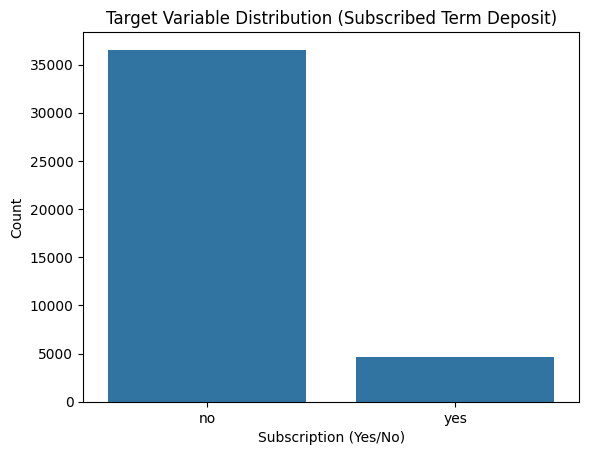

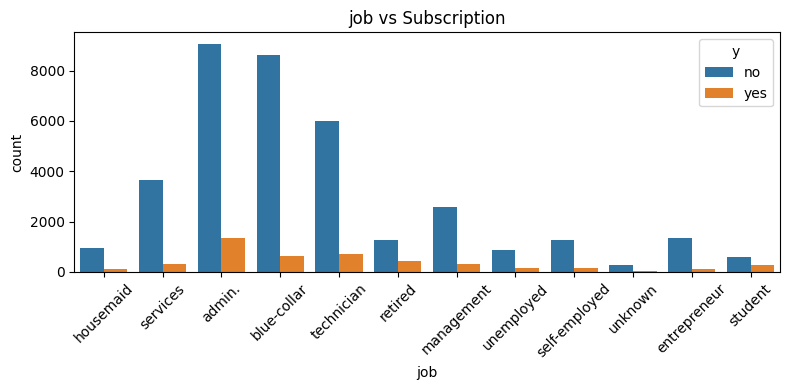

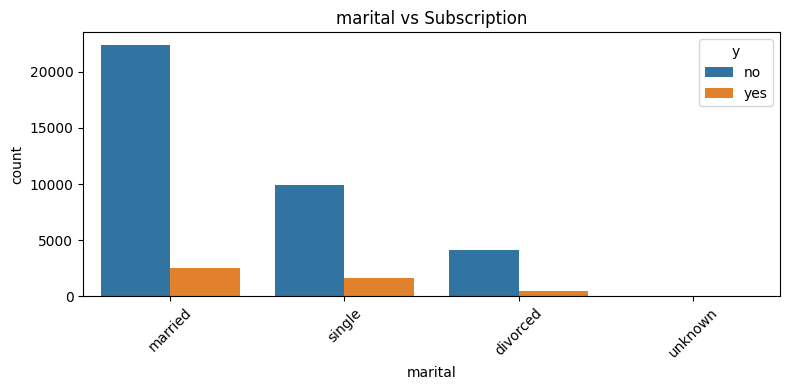

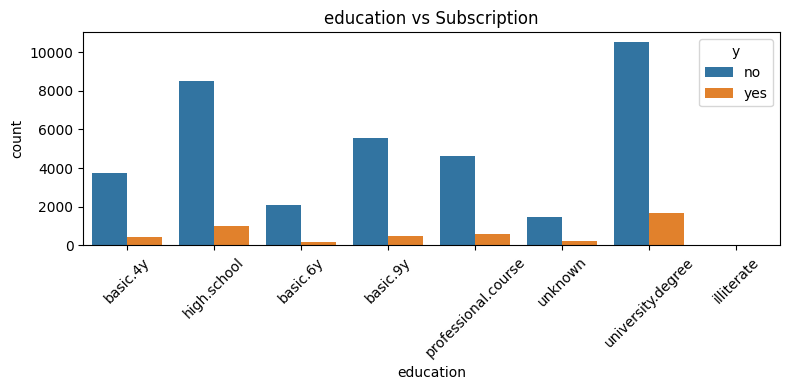

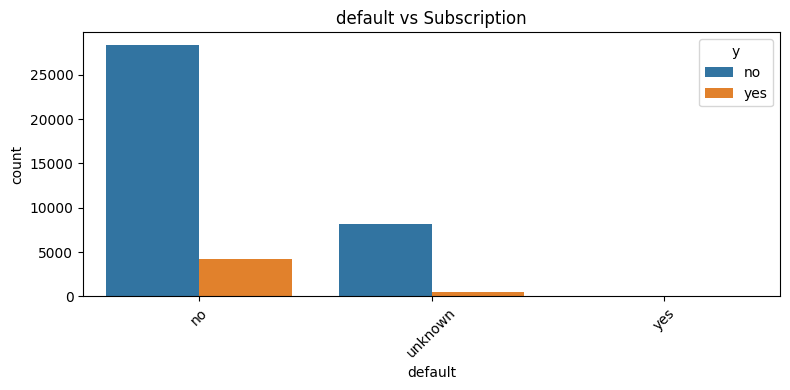

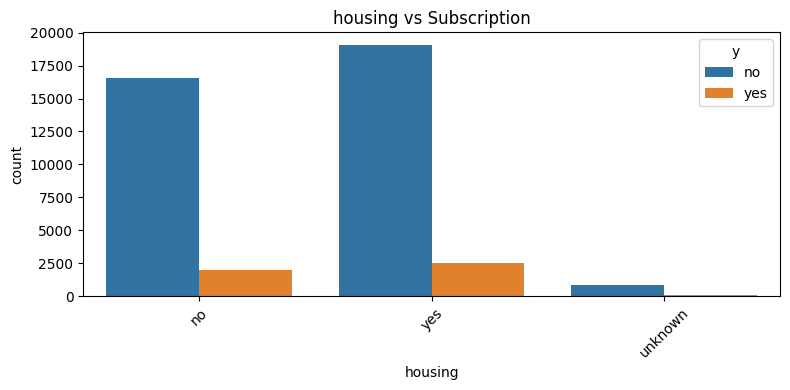

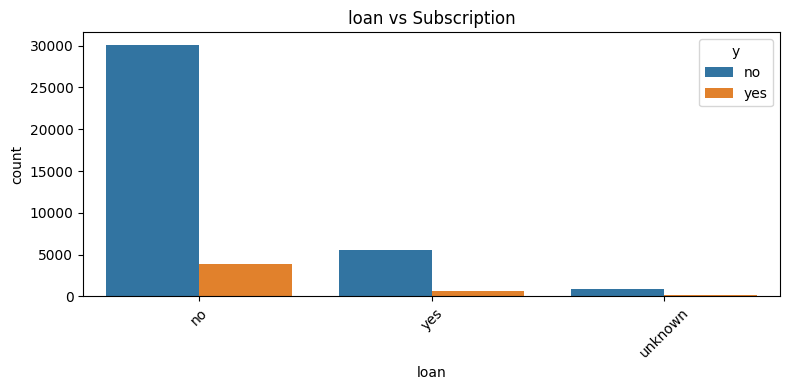

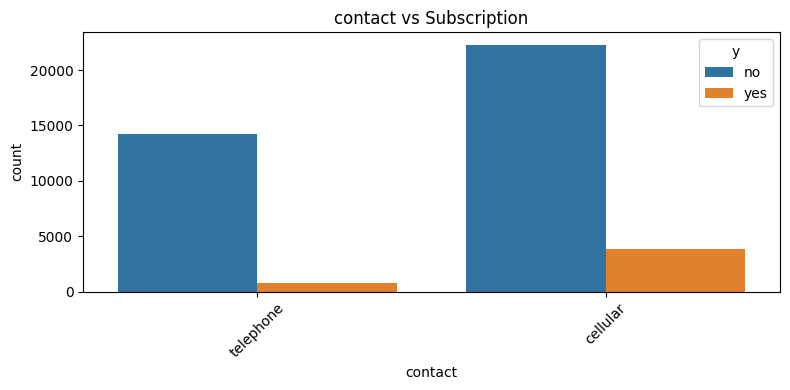

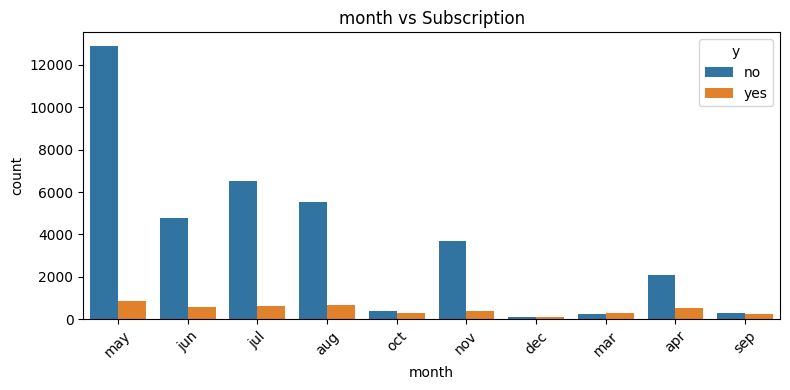

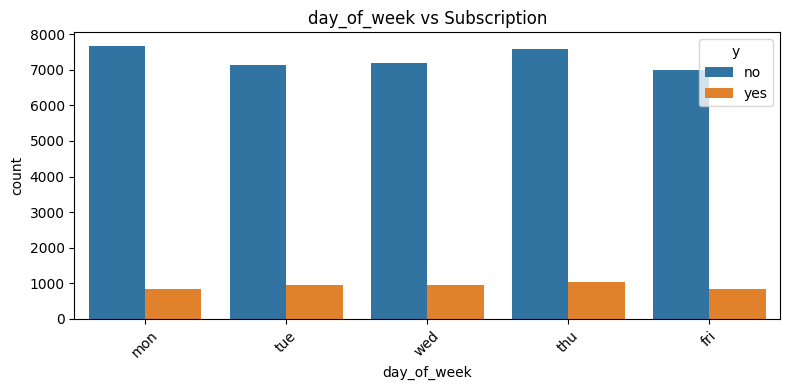

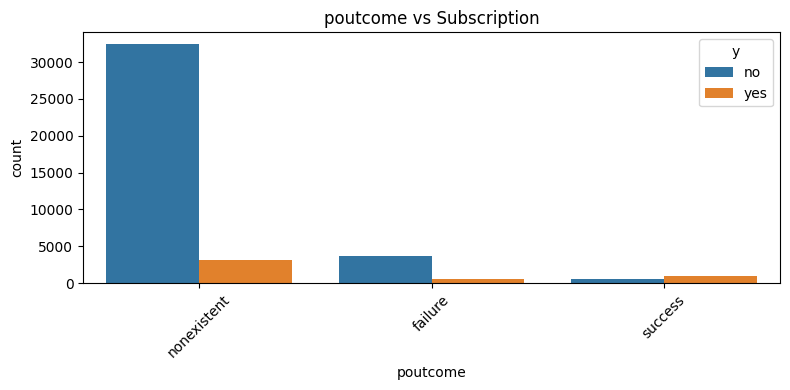

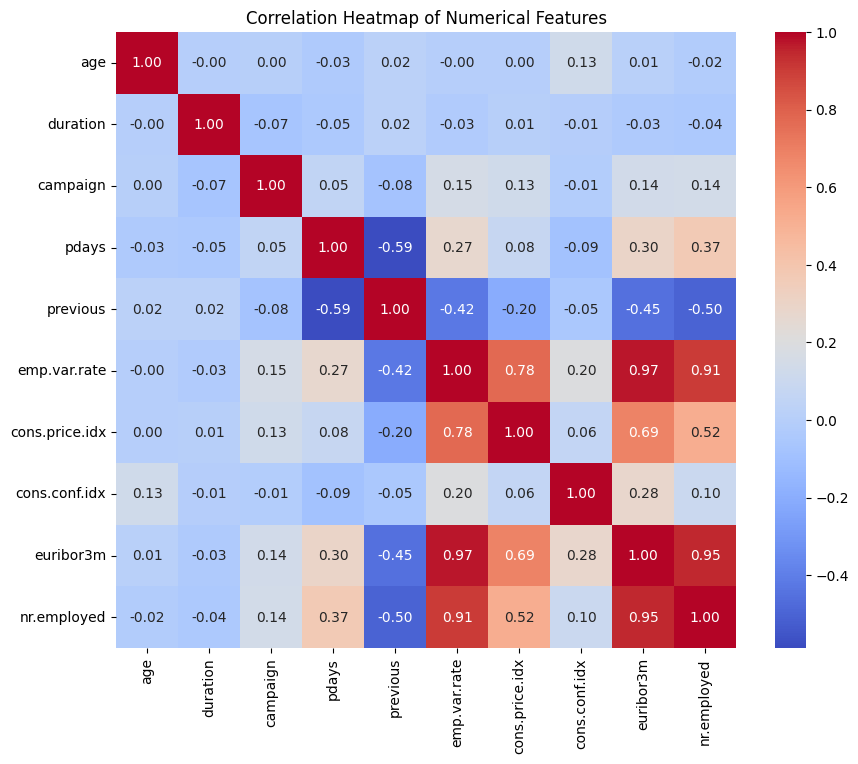

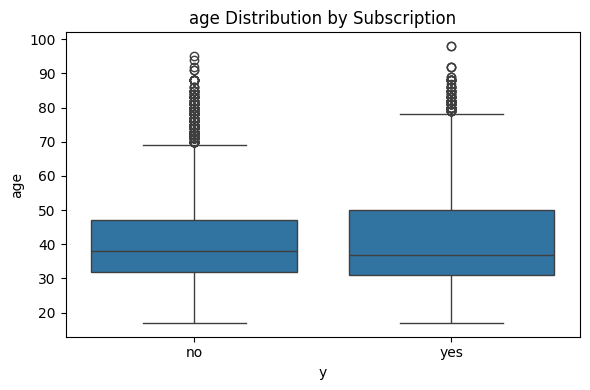

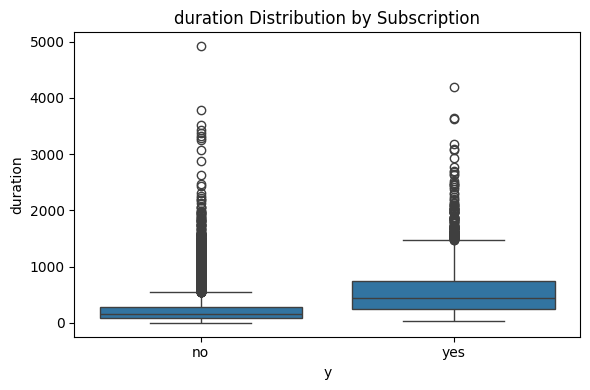

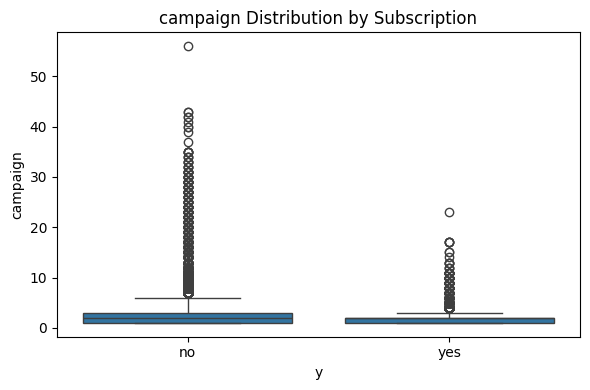

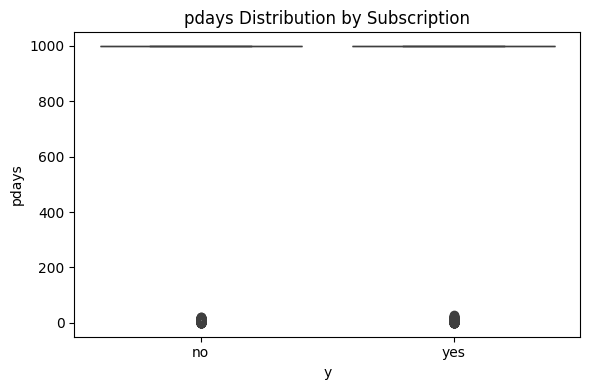

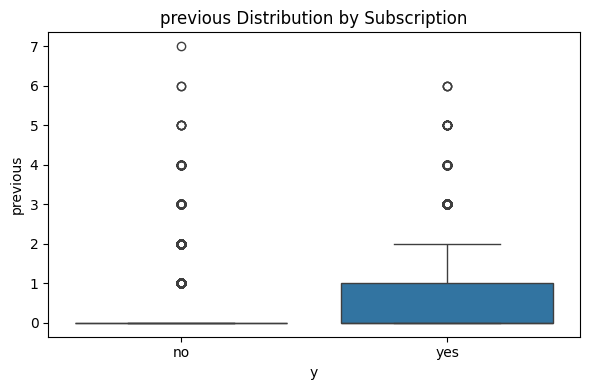

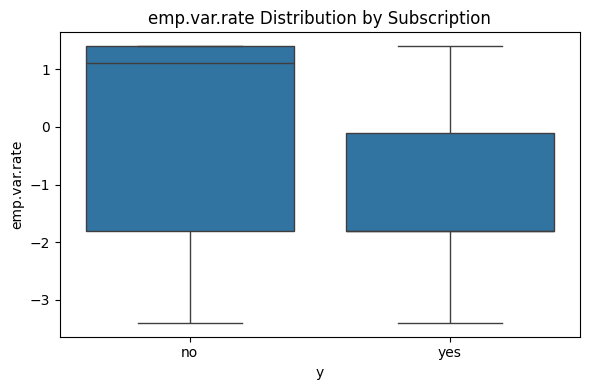

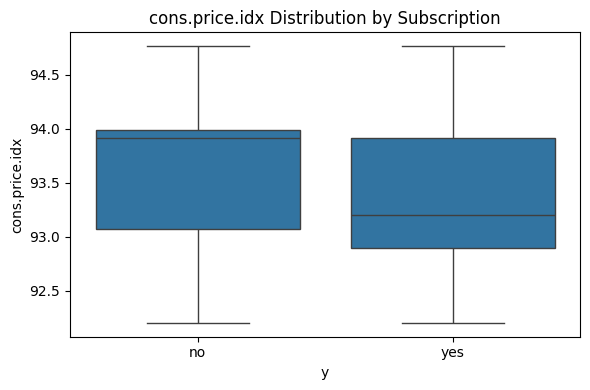

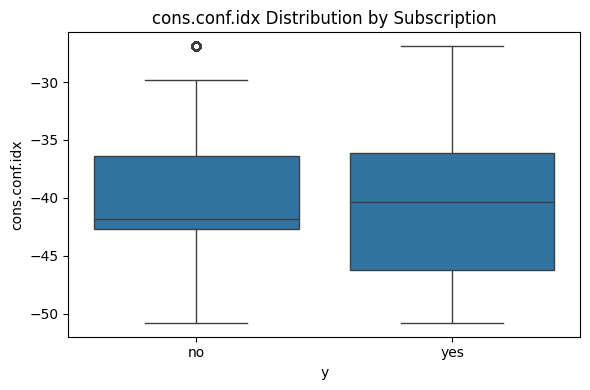

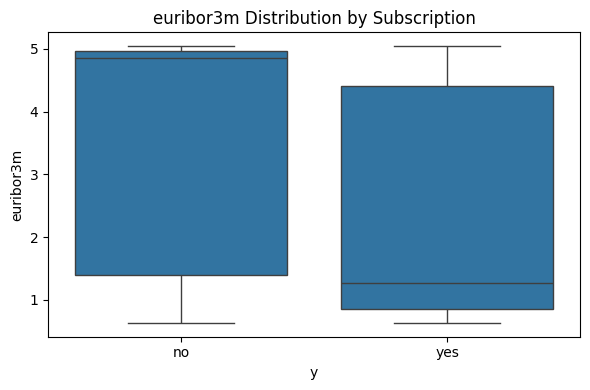

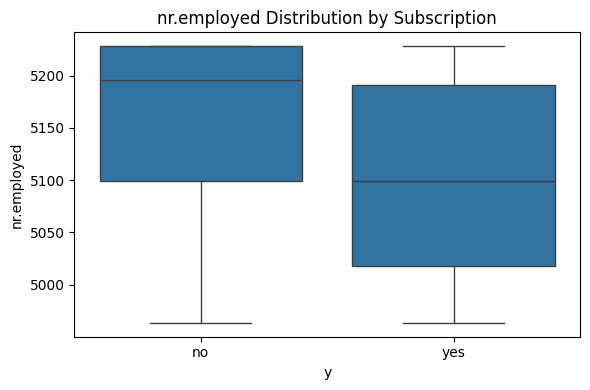

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)

# Plot distribution of target variable
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution (Subscribed Term Deposit)")
plt.xlabel("Subscription (Yes/No)")
plt.ylabel("Count")
plt.show()

# Plot categorical features vs target
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Subscription')
    plt.tight_layout()
    plt.show()
# Correlation heatmap for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
# Boxplot to see distribution of numerical features by target
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'{col} Distribution by Subscription')
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 4: Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Step 5: Define Features and Target
X = df.drop('y', axis=1)
y = df['y']


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 8: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 9: Model Evaluation
y_pred = model.predict(X_test_scaled)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9102937606215101

Confusion Matrix:
 [[7108  195]
 [ 544  391]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



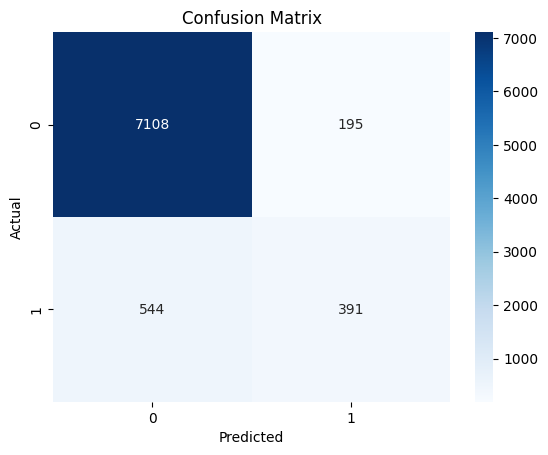

In [ ]:
# Step 10: Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

📊 5. Output & Interpretation
Accuracy Score: Tells how often the model predicted correctly.

Confusion Matrix: Visualizes true positives, false positives, etc.

Classification Report: Shows precision, recall, F1-score.

Note: Since the dataset is imbalanced (more "no" than "yes"), you may see high accuracy but low recall for the minority class. You can handle this with techniques like SMOTE, class_weight='balanced', or undersampling.



